In [15]:
import numpy as np
from glob import glob
import os

from matplotlib import pyplot as plt
from cycler import cycler
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
plt.style.use('thesis')

from scipy.optimize import curve_fit
import scipy.signal as sig

plt.rcParams.update({'figure.dpi': 150})
plt.rcParams.update({'axes.prop_cycle': cycler(color=['#5994cd', '#d74164', '#4eaa76', '#d88300', '#7365cf', \
                                                      '#c85e3e', '#83a23e', '#c851b1', '#1850a1'])})

from importlib import reload
import data_processing as dp

### Look through the drive/data directory and print folder structure

In [3]:
data_path = '/Users/clarke/Documents/Research/Nanospheres/Data/'
# base_path = '/Volumes/LaCie/gas_collisions/pulse_calibration/sphere_20250908/'
base_path = '/Users/clarke/Data/gas_collisions/pulse_calibration/sphere_20251129/' #sphere_20250908/'
# drive_path = '/Volumes/LaCie/'
drive_path = '/Users/clarke/Data/'
# base_path = '/Volumes/LaCie/pulse_calibration/sphere_20250406/'

if not os.path.exists(drive_path):
    print('Error: check that the external drive is plugged in!')

folders = glob(base_path + '*')

datasets = {}

for folder in folders:
    print(folder.split(base_path)[-1])
    all_items = glob(folder + '/*')
    subfolders = np.unique(['_'.join(s.split('_')[:-1]) for s in all_items])
    sub_datasets = []
    for subfolder in subfolders:
        sub_datasets.append(subfolder.split(base_path)[-1].split('/')[-1])
        print('\t' + subfolder.split(base_path)[-1].split('/')[-1])
    datasets[folder.split(base_path)[-1]] = sub_datasets

20251201_p8e_7e-8mbar_d137khz_0
	20251201_dfg_p8e_200ns_10v
	20251201_dfg_p8e_200ns_12.5v
	20251201_dfg_p8e_200ns_15v
	20251201_dfg_p8e_200ns_17.5v
	20251201_dfg_p8e_200ns_2.5v
	20251201_dfg_p8e_200ns_20v
	20251201_dfg_p8e_200ns_5v
	20251201_dfg_p8e_200ns_7.5v
20251201_electric_calibration_7e-8mbar_0
	20250911_d_p8e_117khz_4vpp_lensholder1
	20251201_d_p8e_117khz_0_5vpp_lensholder1
	20251201_d_p8e_117khz_1vpp_lensholder1
	20251201_d_p8e_117khz_2vpp_lensholder1
	20251201_d_p8e_117khz_3vpp_lensholder1
	20251201_d_p8e_117khz_4vpp_lensholder1
	20251201_d_p8e_117khz_5vpp_lensholder1
	20251201_d_p8e_nodrive
20251201_p8e_7e-8mbar_d137khz_1
	20251201_dfg_p8e_200ns_10v
	20251201_dfg_p8e_200ns_12.5v
	20251201_dfg_p8e_200ns_15v
	20251201_dfg_p8e_200ns_17.5v
	20251201_dfg_p8e_200ns_2.5v
	20251201_dfg_p8e_200ns_20v
	20251201_dfg_p8e_200ns_5v
	20251201_dfg_p8e_200ns_7.5v


### Specify impulse and analysis parameters

In [4]:
pulse_amps_1e = np.asarray([12, 34, 57, 80, 103, 127, 150, 174]) # impulses applied to the particle in eV/c
pulse_amps_V = np.arange(2.5, 21, 2.5) # pulse amplitudes applied to lens holder 1 in V

t_window = 1e-3 # half the window length in ms
f_cutoff_high = 1e5 # upper cutoff frequency for the bandpass filter
f_cutoff_low = 2.5e4 # lower cutoff frequency for the bandpass filter
f_cutoff = [f_cutoff_low, f_cutoff_high]

### Load the data

In [ ]:
reload(dp)

# choose which dataset to look at
dataset_ind = 0
dataset = list(datasets.keys())[dataset_ind]

pulse_amps_keV = []
impulses = []
resonance_params = []
suscs = []

plot = False
max_files = 25

# loop through all four files in that dataset in the correct order
for i, file_ind in enumerate([4, 4, 6, 7, 0, 1, 2, 3, 5]):#, 0, 1, 2]): # [3, 0, 1, 2]
    if i == 0 and plot:
        continue
    filename = datasets[list(datasets.keys())[dataset_ind]][file_ind]
    plot_path = 'figures/' + base_path.split(drive_path)[-1] + dataset + '/' + filename \
                if plot else None
    nd = dp.NanoDataset(base_path + dataset + '/' + filename, plot_path, \
                        t_window=t_window, f_cutoff=f_cutoff, verbose=True, max_files=max_files)
    nd.load_files(pulse_amps_1e=pulse_amps_1e, pulse_amps_V=pulse_amps_V, noise=i==0, search=True)
    impulses.append(nd.forces.copy())
    pulse_amps_keV.append([nd.pulse_amp_keV.copy(), 0][i==0])
    resonance_params.append(nd.resonance_params.copy())
    suscs.append(nd.suscs.copy())
    freqs = nd.freqs

    del nd

min_len = np.amin([len(l) for l in impulses])
impulses = np.array([l[:min_len] for l in impulses])
suscs = np.array([l[:min_len] for l in suscs])
resonance_params = np.array([l[:min_len] for l in resonance_params])

Loading file 1...
96.0
	-> Computing force for impulse at t=0.17909 seconds...
	-> Computing force for impulse at t=0.47908 seconds...
	-> Computing force for impulse at t=0.77908 seconds...
	-> Computing force for impulse at t=1.07907 seconds...
	-> Computing force for impulse at t=1.37907 seconds...
	-> Computing force for impulse at t=1.97906 seconds...
	-> Computing force for impulse at t=2.27906 seconds...
	-> Computing force for impulse at t=2.57905 seconds...
	-> Computing force for impulse at t=2.87905 seconds...
	-> Computing force for impulse at t=3.17905 seconds...
	-> Computing force for impulse at t=3.47904 seconds...
	-> Computing force for impulse at t=3.77904 seconds...
	-> Computing force for impulse at t=4.07903 seconds...
	-> Computing force for impulse at t=4.37903 seconds...
	-> Computing force for impulse at t=4.67903 seconds...
	-> Computing force for impulse at t=5.27902 seconds...
	-> Computing force for impulse at t=5.57901 seconds...
	-> Computing force for i

<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\c'
<>:31: SyntaxWarning: invalid escape sequence '\m'
/var/folders/js/qsyryzx92mn4n3v5xr4_1_n40000gn/T/ipykernel_97715/410897407.py:16: SyntaxWarning: invalid escape sequence '\c'
  ax[1].set_ylabel('Phase [$^\circ$]')
/var/folders/js/qsyryzx92mn4n3v5xr4_1_n40000gn/T/ipykernel_97715/410897407.py:31: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel('Time [$\mu$s]')


Text(0, 0.5, '')

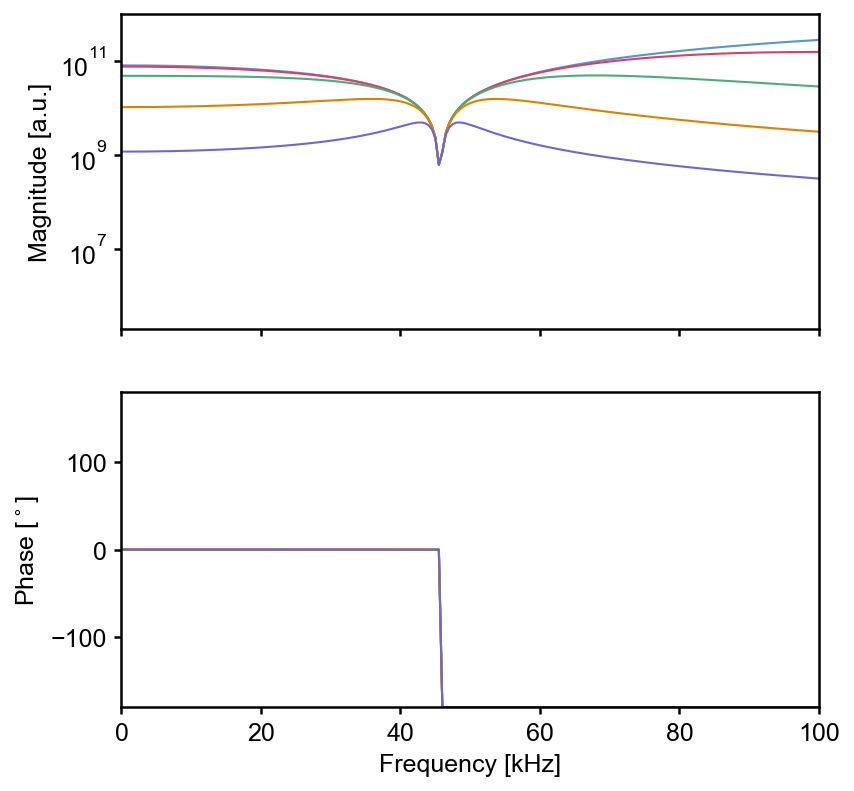

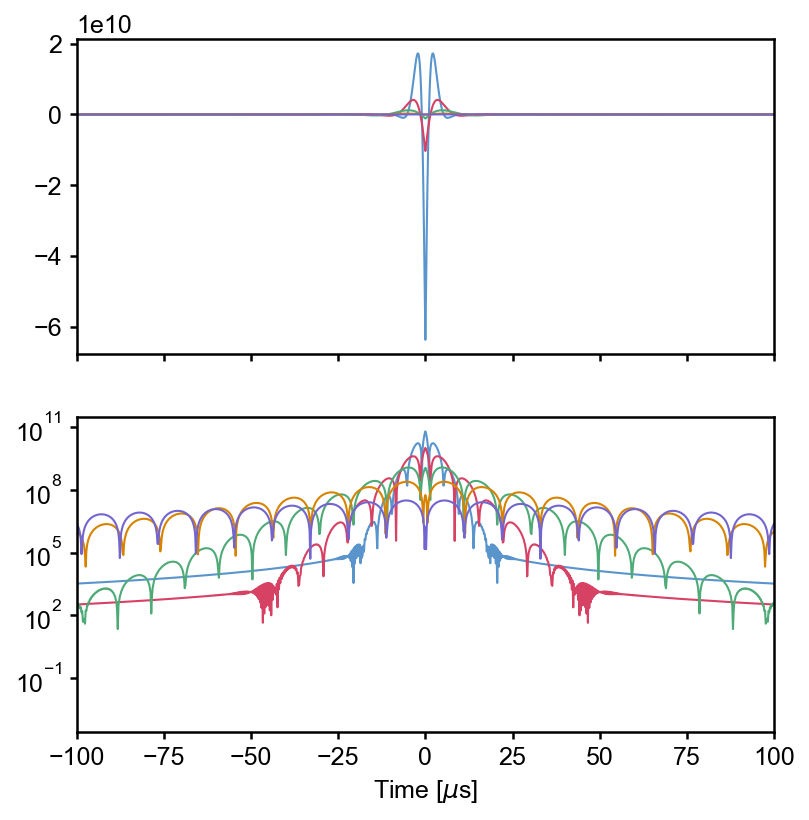

In [29]:
susc = suscs[0, 0]

def opt(susc, C):
    return 1/(susc + C/np.conj(susc))

C_vals = np.logspace(-24, -20, 5)

fig, ax = plt.subplots(2, figsize=(6, 6), sharex=True)
for c in C_vals:
    ax[0].semilogy(freqs*1e-3, np.abs(opt(susc, c)))
    ax[1].plot(freqs*1e-3, np.rad2deg(np.angle(opt(susc, c))))
ax[0].set_xlim([0, 1e2])
ax[1].set_xlim([0, 1e2])
ax[1].set_ylim([-180, 180])
ax[0].set_ylabel('Magnitude [a.u.]')
ax[1].set_ylabel('Phase [$^\circ$]')
ax[1].set_xlabel('Frequency [kHz]')

times = np.arange(0, (len(freqs) - 1)/(np.amax(freqs)), 1/(2*np.amax(freqs)))
times -= times[len(times)//2]
sort_inds = np.concat((np.arange(len(times))[len(times)//2:], np.arange(len(times))[:len(times)//2]))

fig, ax = plt.subplots(2, figsize=(6, 6), sharex=True)
for c in C_vals:
    ax[0].plot(times*1e6, np.fft.irfft(opt(susc, c))[sort_inds])
    ax[1].semilogy(times*1e6, np.abs(np.fft.irfft(opt(susc, c)))[sort_inds])
max_y = 1e15
# ax[0].set_ylim([-max_y, max_y])
# ax[1].set_ylim([0, max_y])
ax[1].set_xlim([-1e2, 1e2])
ax[1].set_xlabel('Time [$\mu$s]')
ax[0].set_ylabel('')

Text(0.5, 0.98, 'Resonance parameter drift')

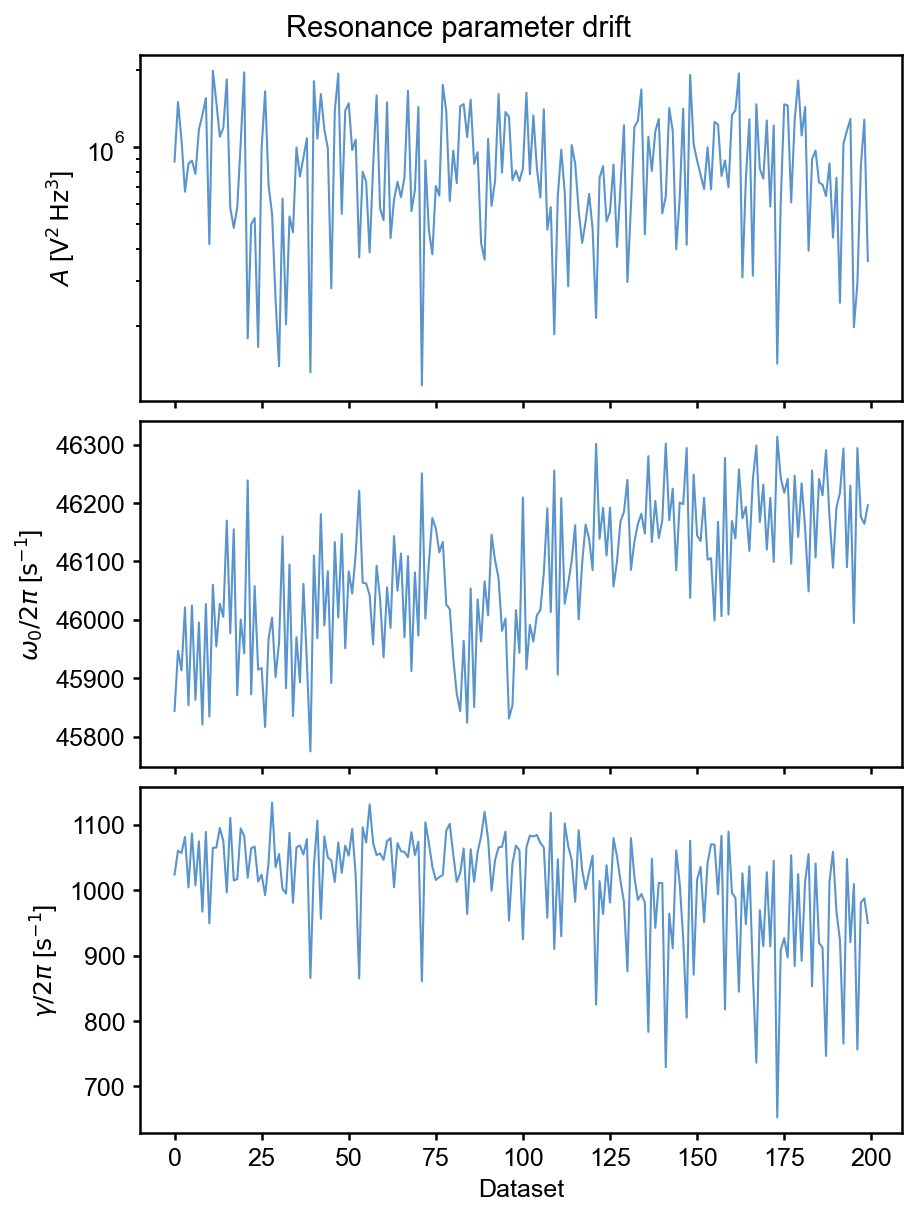

In [ ]:
fig, ax = plt.subplots(3, figsize=(6, 8), sharex=True, layout='constrained')
ax[0].semilogy(resonance_params[0, :, 0], '.', label='$A$')
ax[1].plot(resonance_params[0, :, 1]/2/np.pi, '.')
ax[2].plot(resonance_params[0, :, 2]/2/np.pi, '.')
ax[0].set_ylabel(r'$A$ [$\mathrm{V^2\,Hz^3}$]')
ax[1].set_ylabel(r'$\omega_0/2\pi$ [$\mathrm{s}^{-1}$]')
ax[2].set_ylabel(r'$\gamma/2\pi$ [$\mathrm{s}^{-1}$]')
ax[2].set_xlabel('Dataset')
fig.suptitle('Resonance parameter drift')

<>:11: SyntaxWarning: invalid escape sequence '\c'
<>:11: SyntaxWarning: invalid escape sequence '\c'
/var/folders/js/qsyryzx92mn4n3v5xr4_1_n40000gn/T/ipykernel_98099/279327382.py:11: SyntaxWarning: invalid escape sequence '\c'
  ax.set_ylabel('$|\chi(\omega)|^2$')


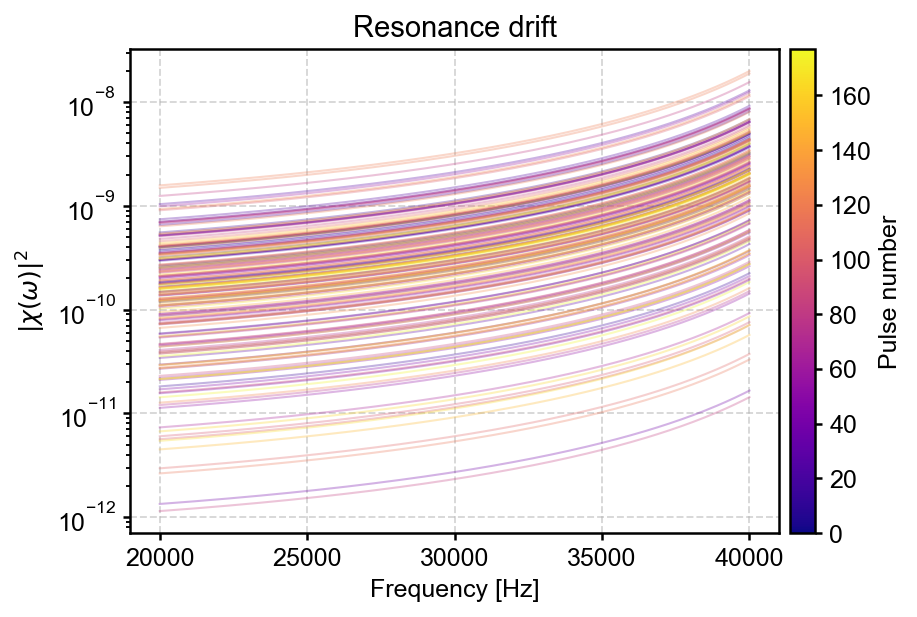

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')

omegas = 2*np.pi*np.linspace(f_cutoff_low, f_cutoff_high, 200)
colors = [plt.get_cmap('plasma', resonance_params.shape[1])(i) for i in range(resonance_params.shape[1])]

for i, params in enumerate(resonance_params[0, :]):
    ax.plot(omegas/2/np.pi, dp.abs_susc2(omegas, *params), alpha=0.3, color=colors[i])

ax.set_yscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$|\chi(\omega)|^2$')
ax.set_title('Resonance drift')
ax.grid()
fig.colorbar(ScalarMappable(norm=Normalize(0, resonance_params.shape[1]), cmap='plasma'), ax=ax, label='Pulse number', pad=0.01)

0 keV impulse:		 81.6 keV resolution
96 keV impulse:		 73.0 keV resolution
272 keV impulse:	 69.9 keV resolution
456 keV impulse:	 88.3 keV resolution
640 keV impulse:	 110.6 keV resolution
824 keV impulse:	 119.8 keV resolution
1016 keV impulse:	 131.9 keV resolution
1200 keV impulse:	 124.1 keV resolution
1392 keV impulse:	 110.0 keV resolution


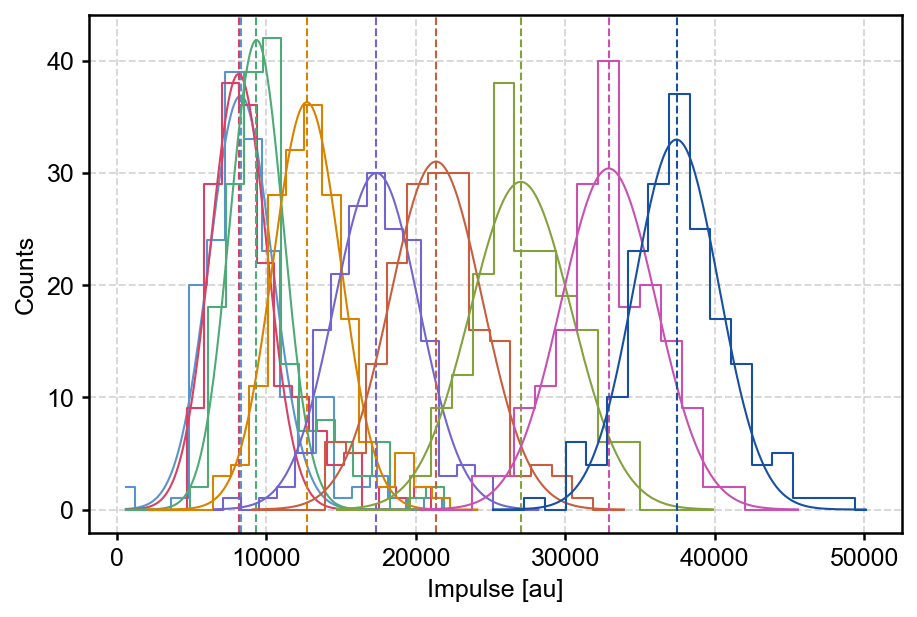

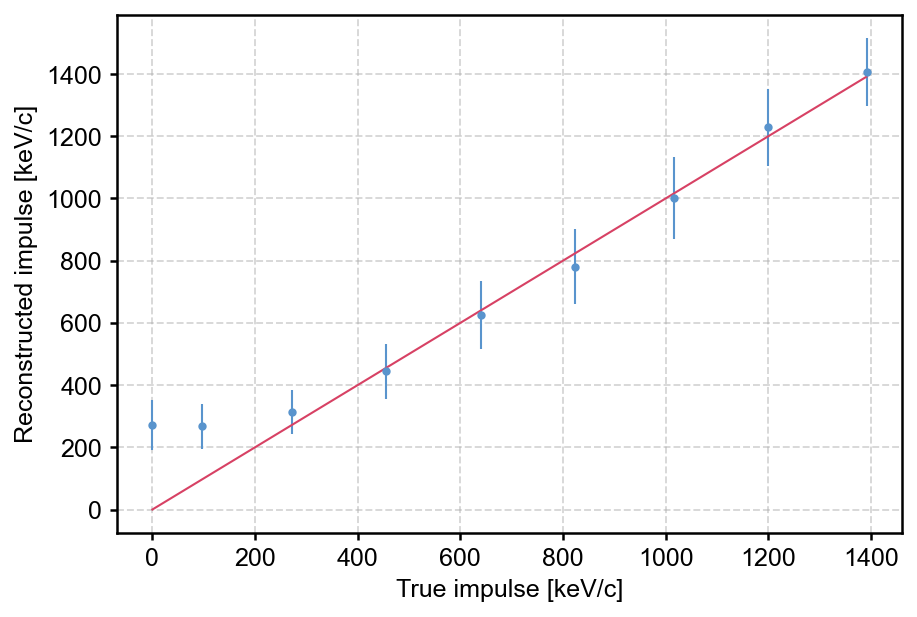

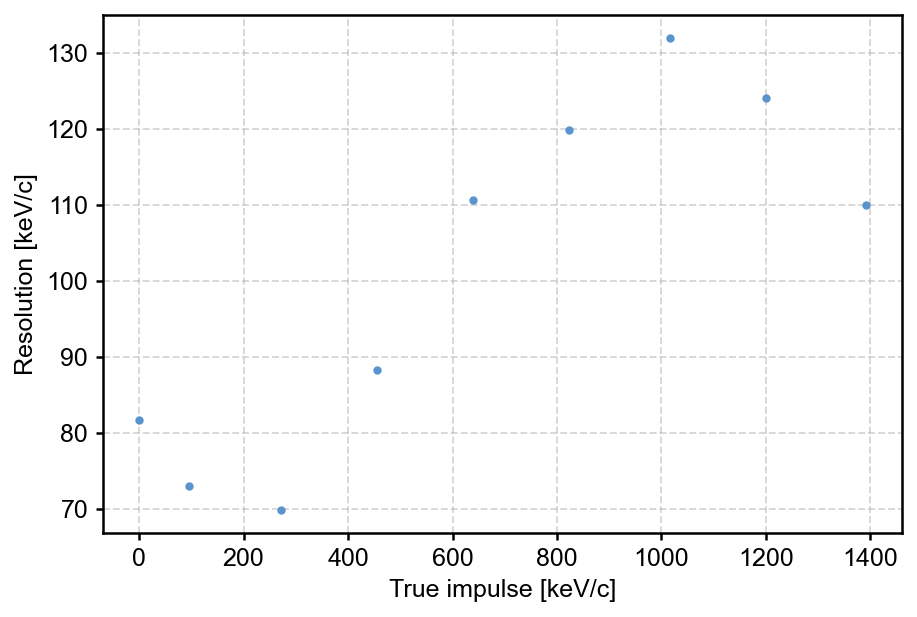

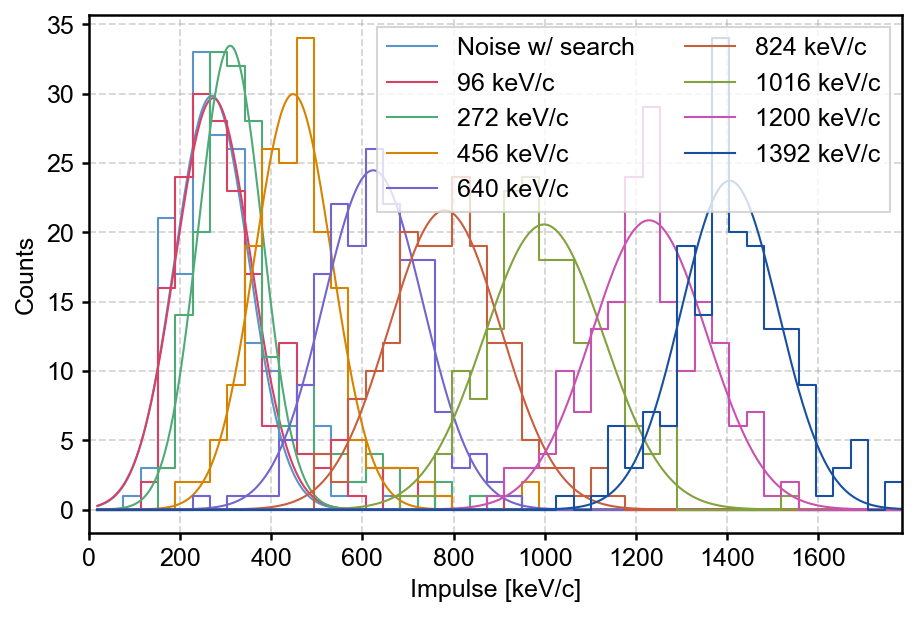

In [62]:
def gaus(x, A, mu, sigma):
    return A*np.exp(-(x - mu)**2/2/sigma**2)

def linear(x, m, b):
    return m*x + b

means = []
errs = []

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
for i, imp in enumerate(impulses):
    mean = np.mean(np.abs(imp))
    std = np.std(np.abs(imp))
    counts, bins = np.histogram(np.abs(imp), bins=np.linspace(np.amax((0, mean - 4*std)), mean + 4*std, 20))
    bins = (bins[:-1] + bins[1:])/2.
    p, _ = curve_fit(gaus, bins, counts, p0=(10, np.mean(np.abs(imp)), np.std(np.abs(imp))))
    plot_bins = np.linspace(bins[0], bins[-1], 200)
    ax.step(bins, counts, color='C' + str(i), where='mid')
    ax.plot(plot_bins, gaus(plot_bins, *p), color='C' + str(i))
    means.append(p[1])
    errs.append(np.abs(p[2]))
    ax.axvline(p[1], ls='--', color='C' + str(i))
ax.set_xlabel('Impulse [au]')
ax.set_ylabel('Counts')
# ax.set_xlim([0, 250])
ax.grid()

errs = np.array(errs)[np.argsort(pulse_amps_keV)]
means = np.array(means)[np.argsort(pulse_amps_keV)]
pulse_amps_sorted = np.sort(pulse_amps_keV)
impulses = impulses[np.argsort(pulse_amps_keV)]

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
plot_amps = np.linspace(0, np.amax(pulse_amps_sorted), 200)
cal_params, _ = curve_fit(linear, pulse_amps_sorted[2:], means[2:])
ax.errorbar(pulse_amps_sorted, means/cal_params[0] - cal_params[1]/cal_params[0], errs/cal_params[0], marker='.', ls='none')
ax.plot(plot_amps, linear(plot_amps, *cal_params)/cal_params[0] - cal_params[1]/cal_params[0])
ax.set_xlabel('True impulse [keV/c]')
ax.set_ylabel('Reconstructed impulse [keV/c]')
ax.grid()

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
ax.plot(pulse_amps_sorted, errs/cal_params[0], marker='.', ls='none')
ax.set_xlabel('True impulse [keV/c]')
ax.set_ylabel('Resolution [keV/c]')
ax.grid()

fig, ax = plt.subplots(figsize=(6, 4), layout='constrained')
for i, imp in enumerate(impulses):
    if i == 0:
        label = 'Noise w/ search'
    else:
        label = '{:.0f} keV/c'.format(pulse_amps_sorted[i])
    imp_cal = np.abs(imp)/cal_params[0] - cal_params[1]/cal_params[0]
    counts, bins = np.histogram(imp_cal, bins=np.linspace(0, 3000, 80))
    bins = (bins[:-1] + bins[1:])/2.
    p0 = (100, np.mean(imp_cal), np.std(imp_cal))
    try:
        p, _ = curve_fit(gaus, bins, counts, p0=p0)
    except RuntimeError:
        p = p0
    plot_bins = np.linspace(bins[0], bins[-1], 1000)
    ax.step(bins, counts, color='C' + str(i), where='mid')
    ax.plot(plot_bins, gaus(plot_bins, *p), color='C' + str(i), label=label)
ax.set_xlim([0, means[-1]/cal_params[0] + 3*errs[-1]/cal_params[0]])
ax.set_xlabel('Impulse [keV/c]')
ax.set_ylabel('Counts')
ax.grid()
ax.legend(ncol=len(impulses)//4)

resolutions = errs/cal_params[0]
for pulse, res in zip(pulse_amps_sorted, resolutions):
    print('{:.0f} keV impulse:{} {:.1f} keV resolution'.format(pulse, '\t'*(1 + int(np.log10(pulse + 1e-12) < 2)), res))


#### With $C$ from noise floor:

0 keV impulse:		 23.9 keV resolution

0 keV impulse:		 67.5 keV resolution

96 keV impulse:		 95.1 keV resolution

272 keV impulse:	 121.1 keV resolution

456 keV impulse:	 144.7 keV resolution

640 keV impulse:	 129.0 keV resolution

824 keV impulse:	 163.4 keV resolution

1016 keV impulse:	 153.7 keV resolution

1200 keV impulse:	 161.5 keV resolution

1392 keV impulse:	 206.2 keV resolution

#### With $C=2\times10^{-23}$:

0 keV impulse:		 23.4 keV resolution

0 keV impulse:		 70.2 keV resolution

96 keV impulse:		 91.4 keV resolution

272 keV impulse:	 121.0 keV resolution

456 keV impulse:	 133.2 keV resolution

640 keV impulse:	 115.7 keV resolution

824 keV impulse:	 154.4 keV resolution

1016 keV impulse:	 146.2 keV resolution

1200 keV impulse:	 131.9 keV resolution

1392 keV impulse:	 179.4 keV resolution

#### 20250911_p10e_4e-8mbar_30khz_d93khz_0 with 25 kHz $<f<$ 35 kHz

$C=0$: array([164.52130735, 170.63247831, 191.28631469, 195.13594568])

$C=10^{-23}$: array([161.33673156, 172.74397352, 189.8121316 , 195.77286286])

$C=10^{-22}$: array([158.59649287, 179.76753647, 200.01657282, 199.80805243])

$C=3\times10^{-23}$: array([158.9040047 , 175.48647758, 195.62403251, 196.81672851])

$C=2\times10^{-23}$: array([159.11806082, 172.94040413, 193.0738833 , 194.75396681])

#### 20250910_p10e_5e-8mbar_30khz_d93khz_0

$C=2\times10^{-23}$: array([282.49357429, 239.32407896, 228.48552635, 280.59351053])

$C=10^{-24}$: array([278.52707479, 235.03460465, 225.51233606, 277.68370185])

### Look at some pulses

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages('figures/output.pdf')

for i in range(5):
    fig, ax = plt.subplots()
    ax.plot(range(10), [j * (i+1) for j in range(10)])
    ax.set_title(f'Figure {i+1}')
    pdf.savefig(fig)   # save to PDF
    plt.close(fig)

# # optional metadata
# info = pdf.infodict()
# info['Title'] = 'My Results'
# info['Author'] = 'Clarke Hardy'
# info['Subject'] = 'Simulation plots'

pdf.close()  # you must close it manually

In [ ]:
def cross_correlation(a, b):
    """Implementation of the cross-correlation between two time series
    using a Toeplitz matrix.
    """
    toeplitz = np.zeros((len(a) + len(b), len(b)))
    for j in range(len(b)):
        toeplitz[j:j + len(a), j] = a[::-1]
    return toeplitz @ b

def autocorrelation(a):
    """Implementation of the autocorrelation of a time series using the
    custom cross-correlation function.
    """
    return cross_correlation(a, a)

def convolution(a, b):
    """Implementation of the convolusion of one signal with another using
    the custom cross-correlation function.
    """
    return cross_correlation(a[::-1], b)

[[-0.44921492  0.          0.         ...  0.          0.
   0.        ]
 [-0.19260177 -0.44921492  0.         ...  0.          0.
   0.        ]
 [-0.32448879 -0.19260177 -0.44921492 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  0.          0.22311182
   0.07092238]
 [ 0.          0.          0.         ...  0.          0.
   0.22311182]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


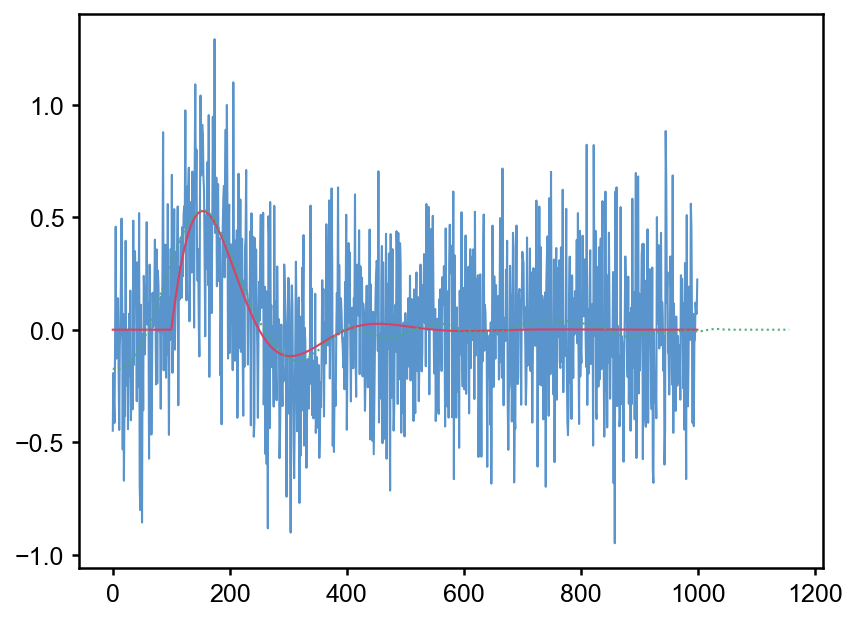

In [ ]:
square = np.zeros(1000)
square[400:600] = 1
triangle = np.zeros(1000)
triangle[400:600] = 1 - np.arange(200)/200.

template = np.zeros(1000)
template[100:900] = np.sin(2*np.pi*np.arange(800)/300)*np.exp(-np.arange(800)/100)

signal = template + np.random.normal(0, 0.3, len(template))
plt.plot(signal)
plt.plot(template)

filtered = convolution(signal, template[::-1])/np.sqrt(np.sum(signal)*np.sum(template))

# plt.figure()
plt.plot(filtered[np.argmax(filtered) - np.argmax(template):], ls=':')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


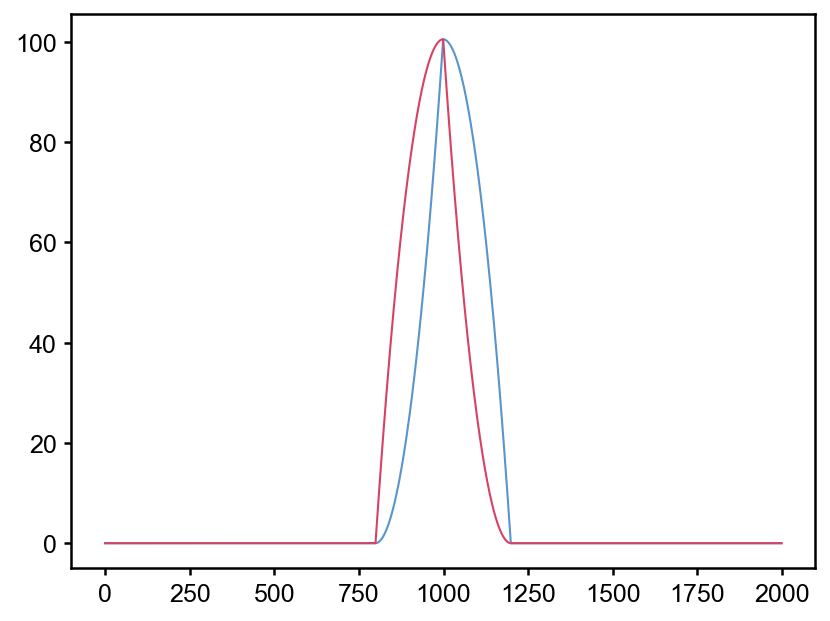

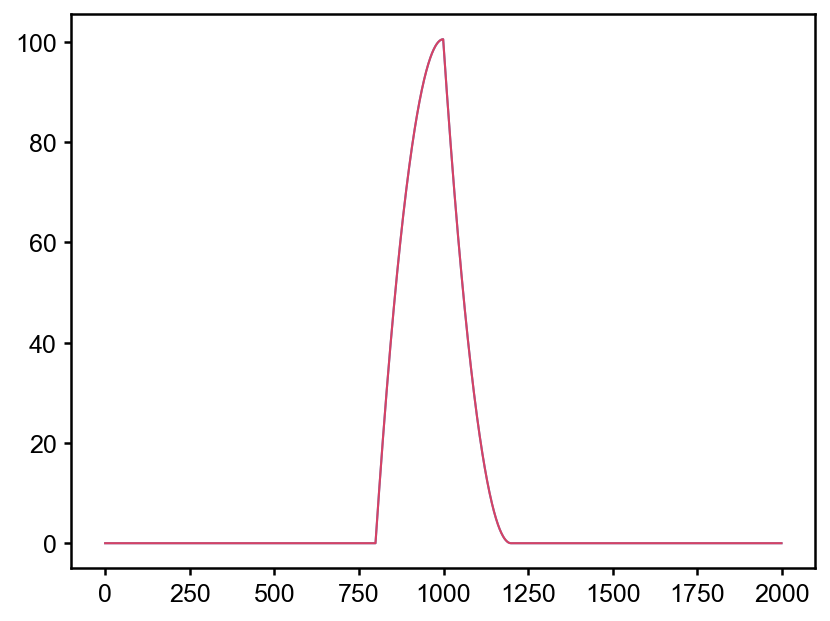

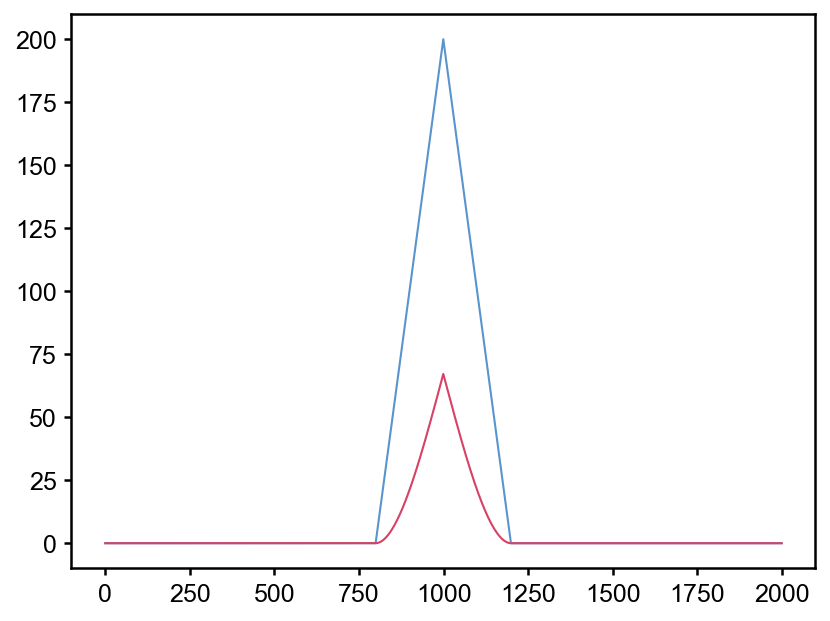

In [ ]:
plt.plot(cross_correlation(triangle, square))
plt.plot(cross_correlation(square, triangle))
plt.figure()
plt.plot(convolution(square, triangle))
plt.plot(convolution(triangle, square))
plt.figure()
plt.plot(autocorrelation(square))
plt.plot(autocorrelation(triangle))

In [ ]:
len(cross_correlation(square, triangle))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


2000

In [ ]:
a = np.arange(1, 6)
b = np.arange(6, 10)
a, b
cross_correlation(a, b)

[[5. 0. 0. 0.]
 [4. 5. 0. 0.]
 [3. 4. 5. 0.]
 [2. 3. 4. 5.]
 [1. 2. 3. 4.]
 [0. 1. 2. 3.]
 [0. 0. 1. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]


array([ 30.,  59.,  86., 110.,  80.,  50.,  26.,   9.,   0.])

In [ ]:
fsamp = 5e6
t_dataset = 6.
nsamp = int(fsamp*t_dataset)

f_noise = np.random.normal(0, 1e-12, nsamp)

# time domain susceptibility, then convolve with the force noise, then add measurement noise

x_meas = sig.convolve(f_noise, np.fft.irfft(susc))
x_meas += np.random.normal(0, 1e-12, len(x_meas))

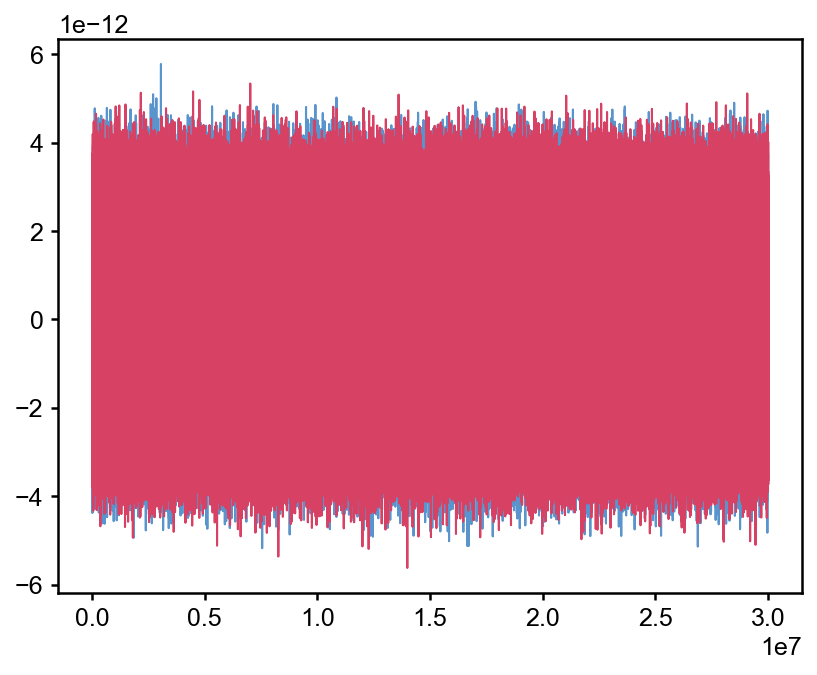

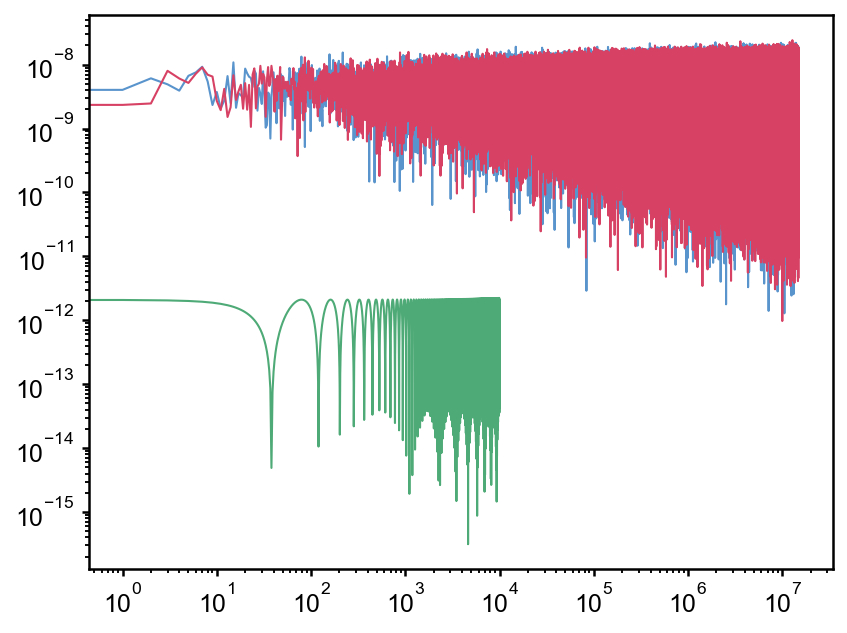

In [ ]:
plt.plot(f_noise)
plt.plot(x_meas)

plt.figure()
plt.loglog(np.abs(np.fft.rfft(f_noise)))
plt.loglog(np.abs(np.fft.rfft(x_meas)))
plt.loglog(np.abs(np.fft.irfft(susc)))

In [64]:
a, b, c = None, None

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
f_noise

29999999.515683968

In [ ]:
import corner

fig = corner.corner(resonance_params[0], labels=['$A$ [$\mathrm{V^2\,Hz^3}$]', \
                                                 '$\omega_0$ [$\mathrm{s}^{-1}$]', \
                                                 '$\gamma$ [$\mathrm{s}^{-1}$]'])